## EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import warnings
warnings.filterwarnings('ignore')
import matplotlib.dates as mdates
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [2]:
df_price = pd.read_csv('/Users/cx/Desktop/SFU/cmpt733/733project/TA/coin_price_time.csv')
df_price.head(1)

,date/hour,close,high,low,open,time,volumefrom,volumeto,price change,high/open,low/open,close/high,close/low,time_second,time_day,time_month,time_AM_PM
0,2017-01-01 09:00:00,961.2,961.56,959.3,961.75,1483261200,309.14,297731.33,0.0,-0.000198,-0.002551,-0.000374,0.001979,2017-01-01 09:00:00,2017-01-01,2017-01,2017-01-01 09:00:00 AM


In [3]:
df = pd.read_csv('/Users/cx/Desktop/SFU/cmpt733/733project/TA/coin_complete_time.csv')
# df_per_day = df.groupby('time').sum()
df.columns

Index(['Unnamed: 0', 'time', 'volumn', 'price change', 'high/open', 'low/open',
       'close/high', 'close/low', 'vader_compound', 'vader_neg', 'vader_neu',
       'vader_pos', 'analysis_page_views', 'charts_page_views',
       'code_repo_closed_issues', 'code_repo_closed_pull_issues',
       'code_repo_forks', 'code_repo_open_issues',
       'code_repo_open_pull_issues', 'code_repo_stars',
       'code_repo_subscribers', 'comments', 'fb_likes', 'fb_talking_about',
       'followers', 'forum_page_views', 'influence_page_views',
       'markets_page_views', 'overview_page_views', 'points', 'posts',
       'reddit_active_users', 'reddit_comments_per_day',
       'reddit_comments_per_hour', 'reddit_posts_per_day',
       'reddit_posts_per_hour', 'reddit_subscribers', 'total_page_views',
       'trades_page_views', 'twitter_favourites', 'twitter_followers',
       'twitter_following', 'twitter_lists', 'twitter_statuses', 'time_second',
       'time_day', 'time_month', 'time_AM_PM'],
     

In [4]:
df_monthly_volume = df[['volumn','time_month']].groupby('time_month').sum()
df_monthly_mean_price = df_price[['time_month','close']].\
                        groupby('time_month').mean()
# df_monthly_mean_price.tail(1)

In [5]:
type(df_monthly_volume)
df_monthly_volume = df_monthly_volume.reset_index()
df_monthly_volume.tail(1)

,time_month,volumn
27,2019-04,62119720.02


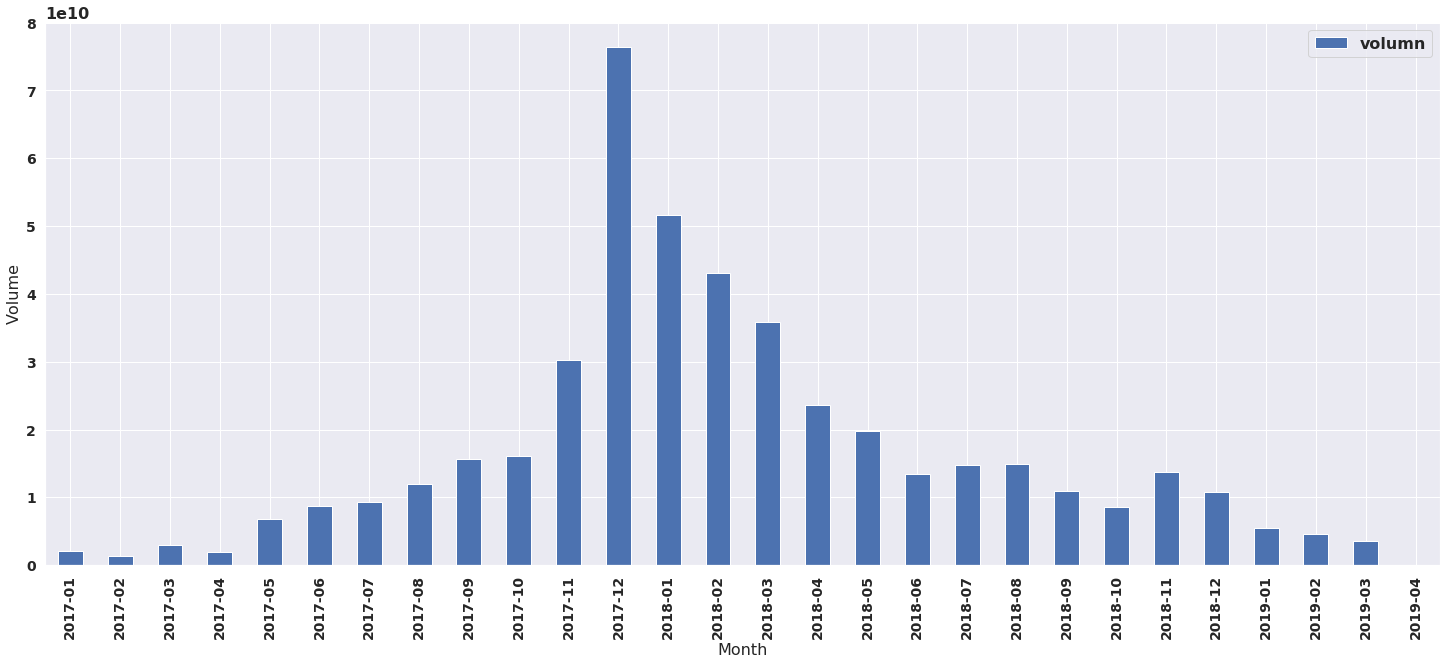

In [6]:
# df_volume = df_monthly_volume[['time_month','volumn']]

plt.rc('xtick', labelsize=16) 
plt.rc('ytick', labelsize=16) 
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 10}

plt.rc('font', **font)

xx = df_monthly_volume['time_month']
df_monthly_volume.plot.bar(x='time_month',figsize=(25,10))
plt.xticks(rotation=90) 
plt.xlabel('Month',fontsize=16)
plt.ylabel('Volume',fontsize=16)
plt.legend(fontsize=16)
plt.tick_params(axis='both',labelsize=14)
plt.show()


In [7]:
df_monthly_mean_price = df_monthly_mean_price.reset_index()
df_monthly_mean_price.head(2)

,time_month,close
0,2017-01,907.745687
1,2017-02,1056.582277


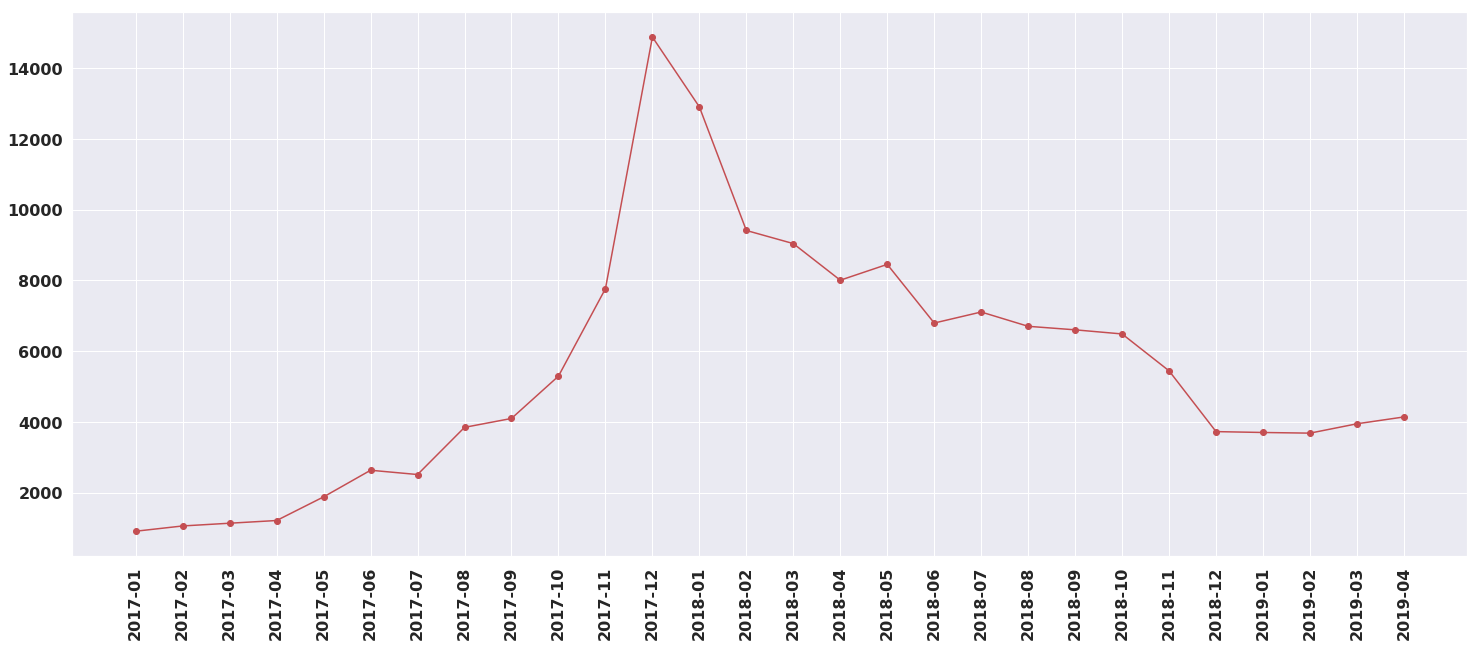

In [8]:
plt.figure(figsize=(25,10))
plt.plot('time_month', 'close','ro-',data=df_monthly_mean_price)
plt.xticks(rotation=90) 
plt.show()

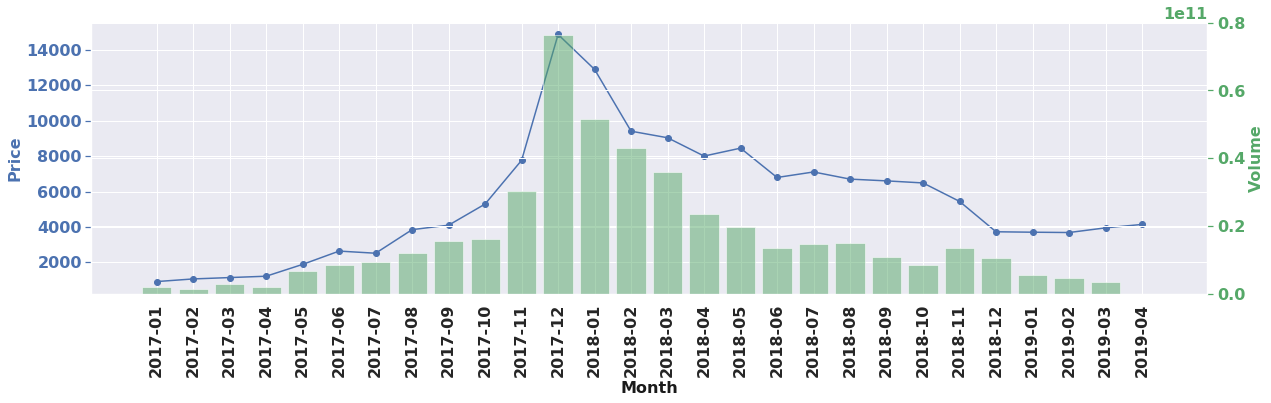

In [9]:
plt.rc('xtick', labelsize=16) 
plt.rc('ytick', labelsize=16)
 
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 16}

plt.rc('font', **font)


figure, ax1 = plt.subplots(figsize=(20,5))
ax1.plot('time_month', 'close','bo-',data=df_monthly_mean_price)
ax1.set_xlabel('month')
# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_xlabel('Month', fontdict=font, color='k')
ax1.set_ylabel('Price', fontdict=font, color='b')
ax1.tick_params('y', colors='b')
plt.xticks(rotation=90) 

ax2 = ax1.twinx()
xx = df_monthly_volume.index
yy = df_monthly_volume['volumn']
ax2.bar(x=xx,height=yy,alpha=0.5, color='g')
ax2.set_ylabel('Volume', fontdict=font, color='g')
ax2.tick_params('y', colors='g')


# fig.tight_layout()
plt.show()

In [278]:
df_senti = df[['time_month','vader_compound','vader_neg','vader_neu','vader_pos']].groupby('time_month').mean()
df_senti.tail(10)


,vader_compound,vader_neg,vader_neu,vader_pos
time_month,,,,
2018-07,0.220390,0.042438,0.877029,0.080546
2018-08,0.168782,0.047632,0.877030,0.075331
2018-09,0.190120,0.045557,0.876547,0.077898
2018-10,0.204310,0.044253,0.878404,0.077341
2018-11,0.150491,0.051566,0.872268,0.076160
2018-12,0.160311,0.048050,0.876622,0.075335
2019-01,0.173873,0.047463,0.878437,0.074100
2019-02,0.234119,0.040831,0.882941,0.076230
2019-03,0.236095,0.040149,0.881408,0.078442


In [30]:
df_senti_may = df[['vader_compound', 'time_day','time_month']].where(df['time_month'] == '2018-05').dropna()
df_senti_may = df_senti_may[['vader_compound','time_day']].groupby('time_day').mean()
df_senti_may.head(1)

,vader_compound
time_day,
2018-05-01,0.261787


In [25]:

# df_may_mean_price.head(1)
df_may_mean_price = df_price[['time_month','time_day','close']]
df_may_mean_price = df_may_mean_price[['time_month','time_day','close']].where(df_may_mean_price['time_month'] == '2018-05').dropna()

df_may_mean_price = df_may_mean_price[['time_day','close']].\
                        groupby('time_day').mean()


df_may_mean_price.head(1)




,close
time_day,
2018-05-01,8996.5125


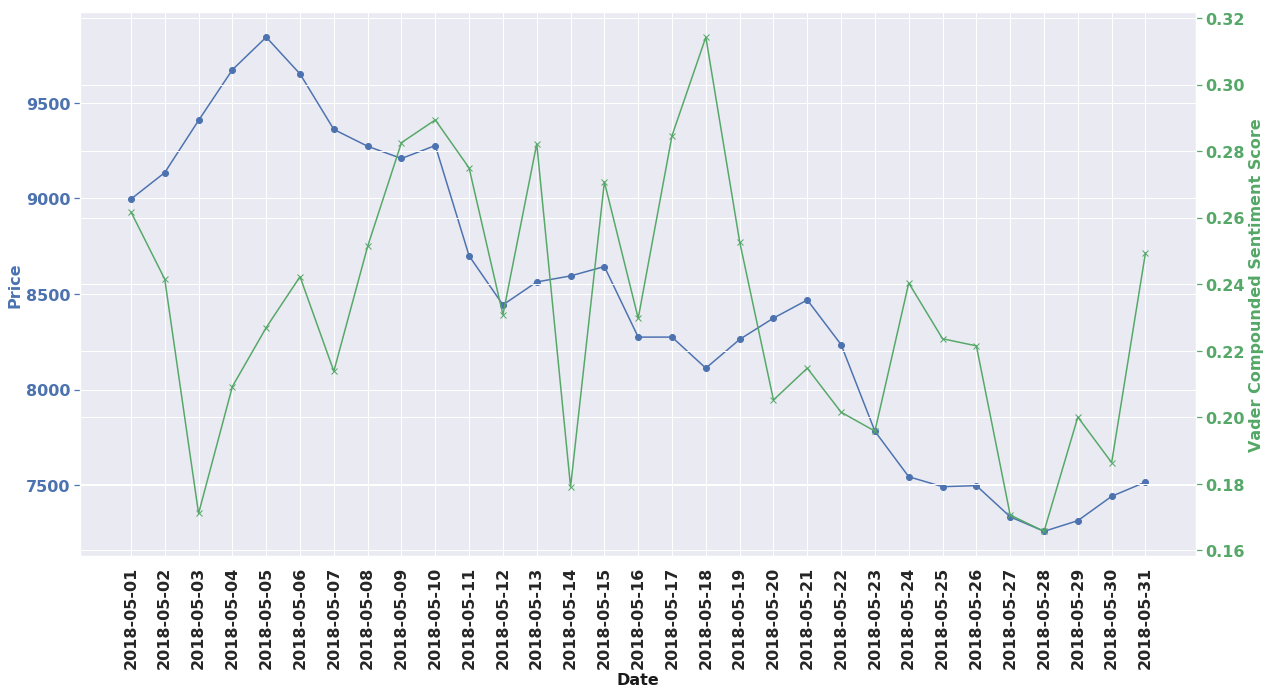

In [33]:
figure, ax1 = plt.subplots(figsize=(20,10))

yy = df_may_mean_price['close']
ax1.plot(df_may_mean_price.index, yy,'bo-',data=df_may_mean_price)

# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_xlabel('Date', fontdict=font, color='k')
ax1.set_ylabel('Price', fontdict=font, color='b')
ax1.tick_params('y', colors='b')
plt.xticks(rotation=90) 

ax2 = ax1.twinx()
ax2.plot(df_senti_may.index, df_senti_may.vader_compound,'g-x', data = df_senti_may)
ax2.set_ylabel('Vader Compounded Sentiment Score', fontdict=font, color='g')
ax2.tick_params('y', colors='g')


# fig.tight_layout()
plt.show()

In [279]:
df_senti_comp = df_senti['vader_compound']
df_senti_comp.tail(1)

time_month
2019-04    0.349804
Name: vader_compound, dtype: float64

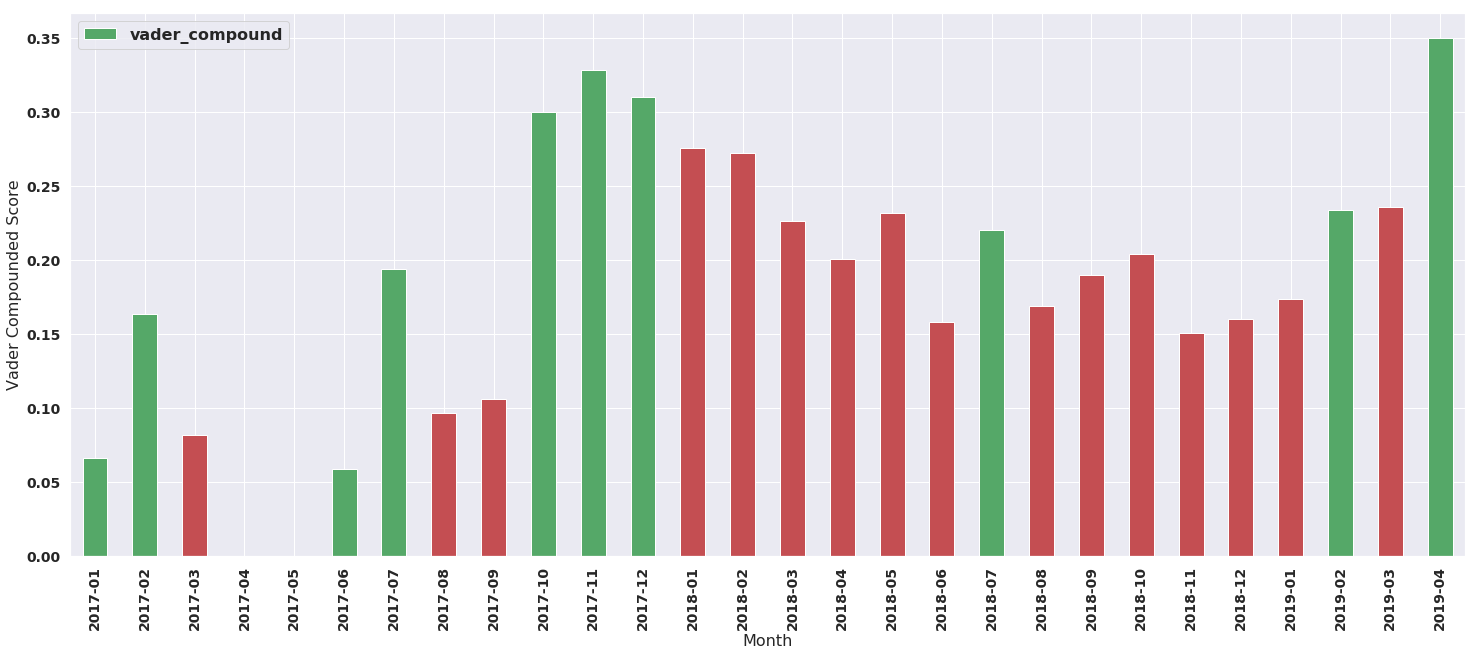

In [312]:
# df_senti = df_senti.reset_index()
#df_senti = df_senti[['time_month','vader_compound']]

colors = []
pre = 0
for value in df_senti_comp: # keys are the names of the boys
    if value >= 0.29:
        colors.append('g')
    elif (value >= 0.25) & (value < 0.28):
        colors.append('r')
    else:
        if value-pre > 0.05:
            colors.append('g')

        else:
            colors.append('r')
    pre = value

df_senti_comp.plot.bar(x=df_senti_comp.index,figsize=(25,10), color = colors)
plt.xticks(rotation=90) 
plt.xlabel('Month',fontsize=16)
plt.ylabel('Vader Compounded Score',fontsize=16)
plt.legend(fontsize=16)
plt.tick_params(axis='both',labelsize=14)
plt.show()

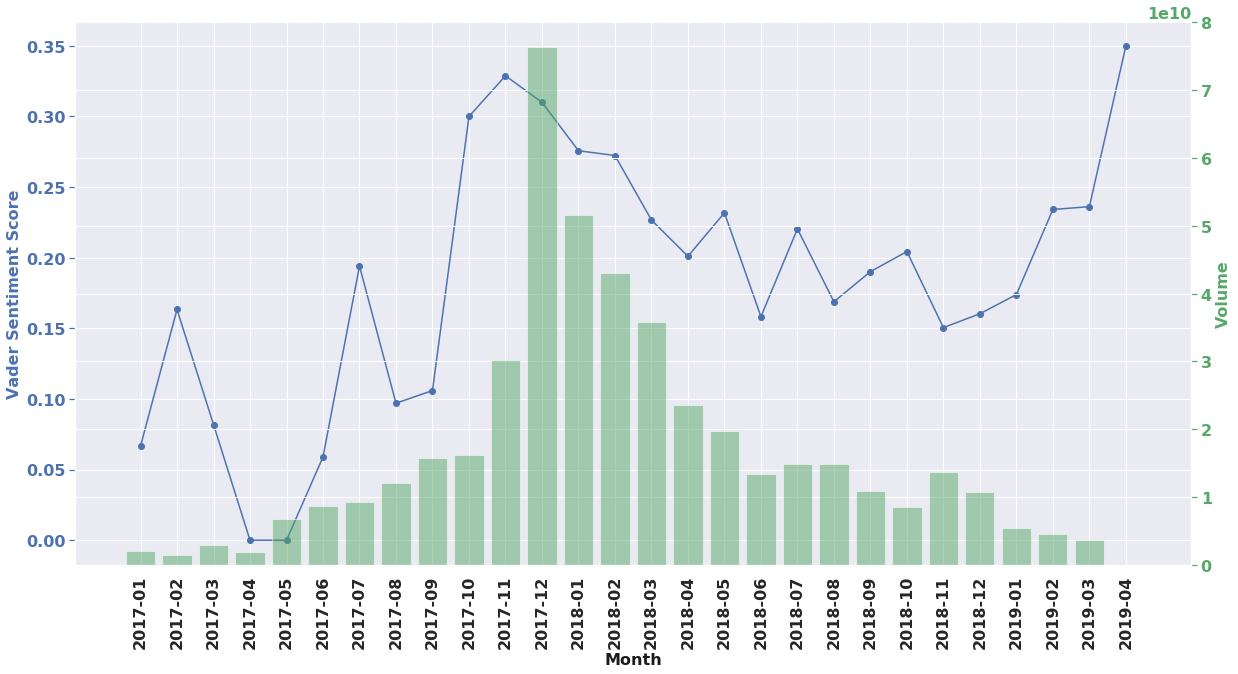

In [313]:
figure, ax1 = plt.subplots(figsize=(20,10))
ax1.plot(df_senti_comp.index, df_senti_comp,'bo-',data=df_senti_comp)

# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_xlabel('Month', fontdict=font, color='k')
ax1.set_ylabel('Vader Sentiment Score', fontdict=font, color='b')
ax1.tick_params('y', colors='b')
plt.xticks(rotation=90) 

ax2 = ax1.twinx()
xx = df_monthly_volume.index
yy = df_monthly_volume['volumn']
ax2.bar(x=xx,height=yy,alpha=0.5, color='g')
ax2.set_ylabel('Volume', fontdict=font, color='g')
ax2.tick_params('y', colors='g')


# fig.tight_layout()
plt.show()

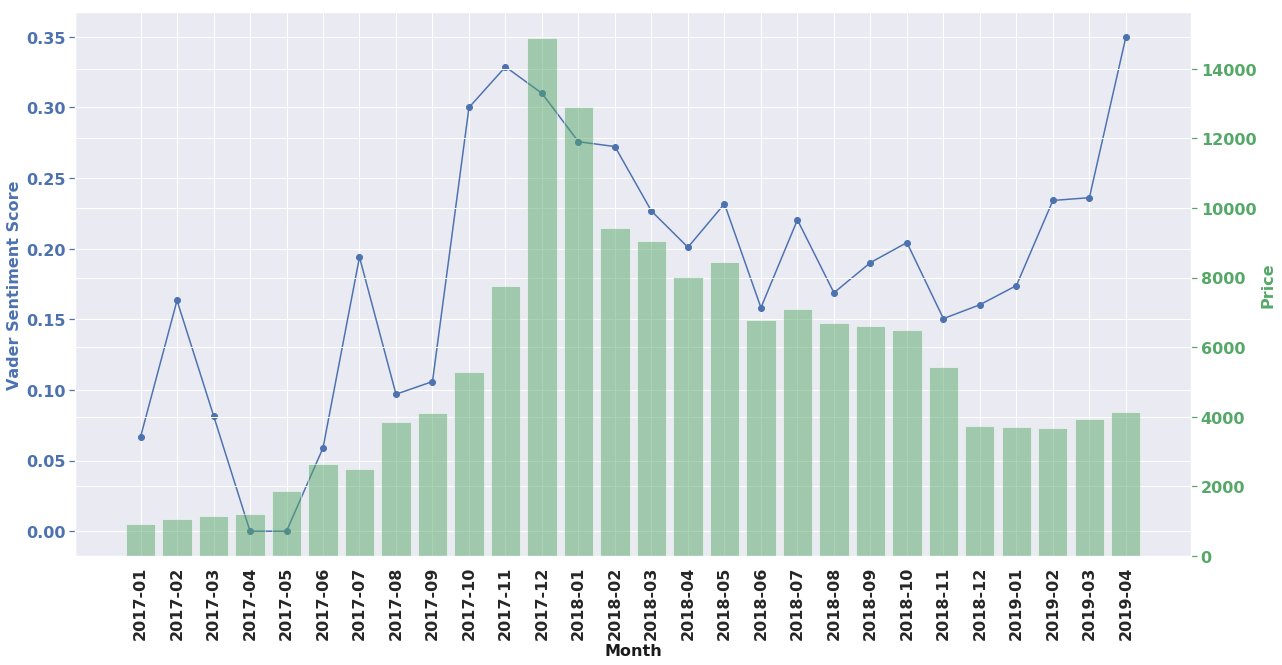

In [314]:
figure, ax1 = plt.subplots(figsize=(20,10))
ax1.plot(df_senti_comp.index, df_senti_comp,'bo-',data=df_senti_comp)

# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_xlabel('Month', fontdict=font, color='k')
ax1.set_ylabel('Vader Sentiment Score', fontdict=font, color='b')
ax1.tick_params('y', colors='b')
plt.xticks(rotation=90) 

ax2 = ax1.twinx()
xx = df_monthly_mean_price['time_month']
yy = df_monthly_mean_price['close']
ax2.bar(x=xx,height=yy,alpha=0.5, color='g')
ax2.set_ylabel('Price', fontdict=font, color='g')
ax2.tick_params('y', colors='g')


# fig.tight_layout()
plt.show()

In [315]:
#could use sns.countplot(hue) from all_news.csv
df_pn = pd.read_csv('/Users/cx/Desktop/SFU/cmpt733/733project/TA/news_PN_sentiment.csv')
df_pn.head(1)

,time,sentiment,time_second,day,month
0,1554101992,positive,2019-04-01 06:59:52,2019-04-01,2019-04


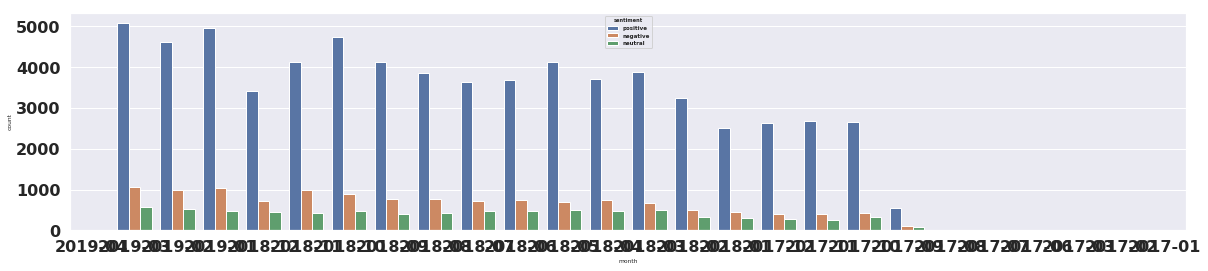

In [318]:
sns.countplot(x='month', hue='sentiment', data=df_pn)